<a href="https://colab.research.google.com/github/JiPang22/MLP/blob/master/%EC%9C%A4%EA%B2%B8%EB%B0%98%EB%B3%B5%EC%97%86%EC%9D%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dt = 0.01 ; itmax = 10000 ; isample = 5 ; dmax = 500
nmax = 200
ncase = 5
ntrain = 10000
ntest = 1000
nn = 4



import pickle
import numpy as np
f = open('/content/drive/MyDrive/data.pkl', 'rb')


my_list = pickle.load(f,encoding='latin1')

train_data = my_list['train_data']
#train_label = my_list['train_label']
test_data = my_list['test_data']
#test_label = my_list['test_label']
#train_data
atr = my_list['train_data']
ate = my_list['test_data']


train_label1 = [0.]*2000 + [1.]*2000 + [2.]*2000 + [3.]*2000 + [4.]*2000
test_label1 = [0.]*200 + [1.]*200 + [2.]*200 + [3.]*200 + [4.]*200


acc = []
loss = []
vacc = []
vloss = []
dmax = 500


label1 =train_label1
#label2 = test_label1
test_label1


[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [ ]:

for k in range(nn):
    noise_train = np.zeros((10000, 500))
#    noise_test = np.zeros((1000, 500))
    label1 = label1 + train_label1
#    label2 = label2 + test_label1

    eta = 0.1*k

    for i in range(10000):
        noise_train[i] = eta * np.random.normal(0,1,500)
#    for i in range(1000):
#        noise_test[i] = eta * np.random.normal(0,1,500)



    train_data = train_data + noise_train
#    test_data = test_data + noise_test

    atr = np.concatenate((atr, train_data),axis=0)
#    ate = np.concatenate((ate, test_data),axis=0)
    
for j in range(1,101):
    
    
    if j == 1:
        train_data1 = atr
#        test_data1 = ate
        
    elif dmax % j !=0:
        continue
        
    else:
        train_data1 = atr[:,::j]
#        test_data1 = ate[:,::j]
        
    
        
    

    train_data = train_data1
    train_label = label1
    train_data1=np.reshape(train_data,(50000,int(dmax/j),1))
    train_label1=np.reshape(train_label,(50000))
    
    from sklearn.model_selection import train_test_split
    train_data1, test_data1, train_label1, test_label1 = train_test_split(train_data1, train_label1, test_size=0.01)
    print(train_data1.shape, train_label1.shape, test_data1.shape, test_label1.shape)
      
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, Activation
    from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
    import os
    a = dmax/j



    MODEL_SAVE_FOLDER_PATH = '/content/drive/MyDrive/model_0607/'

    if not os.path.exists(MODEL_SAVE_FOLDER_PATH):
        os.mkdir(MODEL_SAVE_FOLDER_PATH)

    model_path = MODEL_SAVE_FOLDER_PATH + 'MLP{0}.hdf5'.format(a,b=ntrain)

    cb_checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_accuracy', \
                                    verbose=1, save_best_only=True)
#    cb_early_stopping = EarlyStopping(monitor='val_accuracy', patience=5)

    model = Sequential()

    model.add(Input(shape= int(dmax/j)))

    model.add(Dense(256, activation=None))
    model.add(BatchNormalization())
    model.add(Activation('leaky_relu'))
    model.add(Dropout(0.1))
    
    model.add(Dense(64, activation=None))
    model.add(BatchNormalization())
    model.add(Activation('leaky_relu'))
    model.add(Dropout(0.1))

    model.add(Dense(5, activation='softmax'))

    model.compile(loss='sparse_categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

    hist=model.fit(train_data1, train_label1, validation_split=0.3, \
                   epochs=10, batch_size=200, verbose=1, \
                   callbacks=[cb_checkpoint])


    print('\nAccuracy: {:.4f}'.format(model.evaluate(test_data1, test_label1)[1]))
    
    last1 = hist.history['accuracy']
    acc = acc + np.array(last1[-1]).flatten().tolist()
    last2 = hist.history['loss']
    loss = loss + np.array(last2[-1]).flatten().tolist()
    
    last3 = hist.history['val_accuracy']
    vacc = vacc + np.array(last3[-1]).flatten().tolist()
    last4 = hist.history['val_loss']
    vloss = vloss + np.array(last4[-1]).flatten().tolist()
model.summary()
 

(49500, 500, 1) (49500,) (500, 500, 1) (500,)
Epoch 1/10
169/174 [============================>.] - ETA: 0s - loss: 1.0911 - accuracy: 0.5178
Epoch 1: val_accuracy improved from -inf to 0.29131, saving model to /content/drive/MyDrive/model_0607/MLP500.0.hdf5
174/174 [==============================] - 3s 13ms/step - loss: 1.0875 - accuracy: 0.5188 - val_loss: 1.9630 - val_accuracy: 0.2913
Epoch 2/10
172/174 [============================>.] - ETA: 0s - loss: 0.8462 - accuracy: 0.6198
Epoch 2: val_accuracy improved from 0.29131 to 0.57630, saving model to /content/drive/MyDrive/model_0607/MLP500.0.hdf5
174/174 [==============================] - 2s 13ms/step - loss: 0.8461 - accuracy: 0.6198 - val_loss: 0.9096 - val_accuracy: 0.5763
Epoch 3/10
174/174 [==============================] - ETA: 0s - loss: 0.7540 - accuracy: 0.6638
Epoch 3: val_accuracy improved from 0.57630 to 0.71253, saving model to /content/drive/MyDrive/model_0607/MLP500.0.hdf5
174/174 [==============================] - 3s

KeyboardInterrupt: ignored

In [ ]:
from keras.models import load_model
#노이즈 증가에 따른 모델 정확도
import matplotlib.pyplot as plt
import numpy as np
import pickle
import numpy as np

accnn= []
lossnn = []
neta = np.zeros((10))
f = open('/content/drive/MyDrive/data.pkl', 'rb')
dmax= 500

my_list = pickle.load(f,encoding='latin1')

test_data = my_list['test_data']
test_label1 = [0.]*200 + [1.]*200 + [2.]*200 + [3.]*200 + [4.]*200

noise_test = np.zeros((1000, 500))

for k in range(10):
    eta = 0.1*k
    neta[k] = 0.1*k 
    for i in range(1000):
        noise_test[i] = eta * np.random.normal(0,1,500)

    test_data = test_data + noise_test
    
    for j in range(1,101):
    
    
        if j == 1:
            test_data1 = test_data

        elif dmax % j !=0:
            continue

        else:
            test_data1 = test_data[:,::j]
            
        c = dmax/j

        test_data1=np.reshape(test_data1,(1000,int(dmax/j),1))
        test_label1=np.reshape(test_label1,(1000))
        

        model = load_model('/content/drive/MyDrive/model_0607/MLP{0}.hdf5'.format(c))
        a = model.evaluate(test_data1, test_label1)
        accnn.append(a[1])
        lossnn.append(a[0])

32/32 [==============================] - 0s 5ms/step - loss: 2.9061 - accuracy: 0.2070


32/32 [==============================] - 0s 3ms/step - loss: 0.3408 - accuracy: 0.8690

accuracy: 86.90%


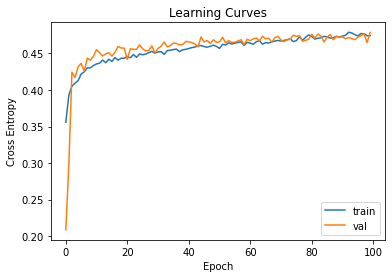

In [ ]:
from keras.models import load_model
f = open('./data.pkl', 'rb')

my_list = pickle.load(f,encoding='latin1')

test = my_list['test_data']
testl = [0.]*200 + [1.]*200 + [2.]*200 + [3.]*200 + [4.]*200
test_d=np.reshape(test,(1000,500,1))
test_l=np.reshape(testl,(1000))

model = load_model('./model_0607/MLP500.0.hdf5')

scores = model.evaluate(test_d, test_l)

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy')
plt.plot(hist.history['accuracy'], label='train')
plt.plot(hist.history['val_accuracy'], label='val')
plt.legend()
plt.show()

In [ ]:
an= np.array(accnn)
an =an.reshape(10,9)
ln= np.array(lossnn)
ln = ln.reshape(10,9)

In [ ]:
an[0,:]

array([0.92299998, 0.93300003, 0.90200001, 0.89399999, 0.90799999,
       0.88499999, 0.87699997, 0.80599999, 0.57300001])

In [ ]:
ln

array([[0.20035157, 0.19266559, 0.25761163, 0.28563917, 0.26390401,
        0.30293554, 0.31831619, 0.47229862, 1.00144565],
       [0.25514573, 0.28414786, 0.36733988, 0.39969799, 0.47873911,
        0.568389  , 0.58502764, 0.71408492, 1.14608634],
       [0.52159542, 0.58968192, 0.73488367, 0.69513023, 0.85372621,
        0.99593562, 0.99290538, 1.10458744, 1.37462878],
       [1.09137332, 1.19299889, 1.2395612 , 1.22564149, 1.42280757,
        1.47459781, 1.48089647, 1.42154932, 1.67634118],
       [1.97198963, 2.10867834, 2.04427171, 2.12797332, 2.13519573,
        1.97737801, 2.0031395 , 1.82218719, 1.78506887],
       [2.97820759, 3.23162198, 3.00632858, 3.07021928, 2.99106622,
        2.67924738, 2.71477294, 2.23300147, 1.98792326],
       [4.36735249, 4.28129292, 4.11913204, 3.95769525, 4.1601162 ,
        3.44983673, 3.20245886, 2.42054152, 2.08520532],
       [5.74180794, 5.42256212, 5.60443592, 5.01719809, 5.15857649,
        4.21905661, 3.98639297, 2.81533957, 2.35627675],


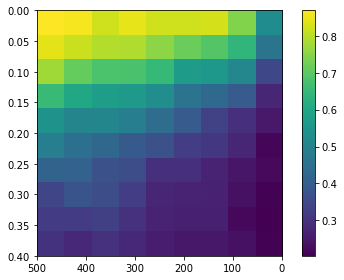

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.figure()

plt.imshow(an,extent=(500,0,0.4,0),aspect=1250)
plt.colorbar()
plt.grid(False)
plt.tight_layout()
fig = plt.gcf()
fig.savefig('imshowacc.png', dpi=1000)

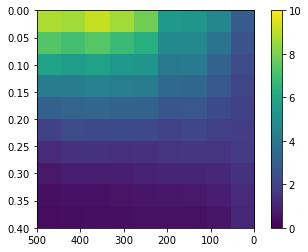

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

plt.figure()
plt.imshow(ln,origin = 'lower',extent=(500,0,0.4,0),aspect=1250, vmin = 0, vmax = 10 )
plt.colorbar()
#plt.clim(9.0,0.0) 
plt.grid(False)
fig = plt.gcf()
fig.savefig('imshowloss.png', dpi=1000)

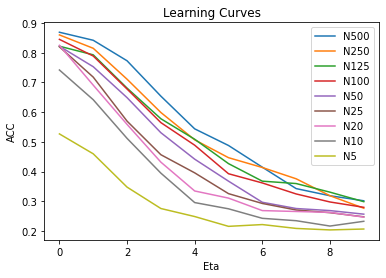

In [ ]:
plt.title('Learning Curves')
plt.xlabel('Eta')
plt.ylabel('ACC')
plt.plot(an[:,0], label='N500')
plt.plot(an[:,1], label='N250')
plt.plot(an[:,2], label='N125')
plt.plot(an[:,3], label='N100')
plt.plot(an[:,4], label='N50')
plt.plot(an[:,5], label='N25')
plt.plot(an[:,6], label='N20')
plt.plot(an[:,7], label='N10')
plt.plot(an[:,8], label='N5')

plt.legend()
fig = plt.gcf()
fig.savefig('Netaacc.png', dpi=1000)

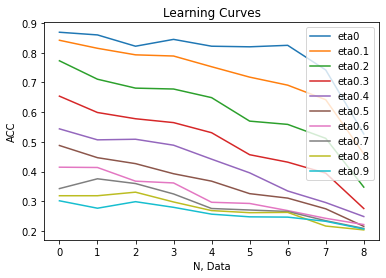

In [ ]:
plt.title('Learning Curves')
plt.xlabel('N, Data')
plt.ylabel('ACC')
plt.plot(an[0,:], label='eta0')
plt.plot(an[1,:], label='eta0.1')
plt.plot(an[2,:], label='eta0.2')
plt.plot(an[3,:], label='eta0.3')
plt.plot(an[4,:], label='eta0.4')
plt.plot(an[5,:], label='eta0.5')
plt.plot(an[6,:], label='eta0.6')
plt.plot(an[7,:], label='eta0.7')
plt.plot(an[8,:], label='eta0.8')
plt.plot(an[9,:], label='eta0.9')

plt.legend()
fig = plt.gcf()
fig.savefig('etaNacc.png', dpi=1000)

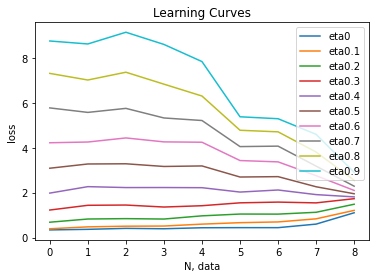

In [ ]:
plt.title('Learning Curves')
plt.xlabel('N, data')
plt.ylabel('loss')
plt.plot(ln[0,:], label='eta0')
plt.plot(ln[1,:], label='eta0.1')
plt.plot(ln[2,:], label='eta0.2')
plt.plot(ln[3,:], label='eta0.3')
plt.plot(ln[4,:], label='eta0.4')
plt.plot(ln[5,:], label='eta0.5')
plt.plot(ln[6,:], label='eta0.6')
plt.plot(ln[7,:], label='eta0.7')
plt.plot(ln[8,:], label='eta0.8')
plt.plot(ln[9,:], label='eta0.9')

plt.legend()
fig = plt.gcf()
fig.savefig('etaNloss.png', dpi=1000)

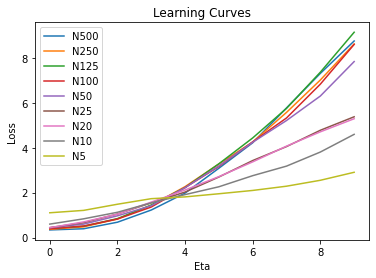

In [ ]:
plt.title('Learning Curves')
plt.xlabel('Eta')
plt.ylabel('Loss')
plt.plot(ln[:,0], label='N500')
plt.plot(ln[:,1], label='N250')
plt.plot(ln[:,2], label='N125')
plt.plot(ln[:,3], label='N100')
plt.plot(ln[:,4], label='N50')
plt.plot(ln[:,5], label='N25')
plt.plot(ln[:,6], label='N20')
plt.plot(ln[:,7], label='N10')
plt.plot(ln[:,8], label='N5')

plt.legend()
fig = plt.gcf()
fig.savefig('Netaloss.png', dpi=1000)

In [ ]:
dt = 0.01 ; itmax = 10000 ; isample = 5 ; dmax = 500
nmax = 200
ncase = 5
ntrain = 10000
ntest = 1000
nn = 4



import pickle
import numpy as np
f = open('./data.pkl', 'rb')


my_list = pickle.load(f,encoding='latin1')

train_data = my_list['train_data']
#train_label = my_list['train_label']
test_data = my_list['test_data']
#test_label = my_list['test_label']
#train_data
atr = my_list['train_data']
ate = my_list['test_data']


train_label1 = [0.]*2000 + [1.]*2000 + [2.]*2000 + [3.]*2000 + [4.]*2000
test_label1 = [0.]*200 + [1.]*200 + [2.]*200 + [3.]*200 + [4.]*200


acc = []
loss = []
vacc = []
vloss = []
dmax = 500


label1 =train_label1
#label2 = test_label1

for k in range(nn):
    noise_train = np.zeros((10000, 500))
#    noise_test = np.zeros((1000, 500))
    label1 = label1 + train_label1
#    label2 = label2 + test_label1

    eta = 0.1*k

    for i in range(10000):
        noise_train[i] = eta * np.random.normal(0,1,500)
#    for i in range(1000):
#        noise_test[i] = eta * np.random.normal(0,1,500)



    train_data = train_data + noise_train
#    test_data = test_data + noise_test

    atr = np.concatenate((atr, train_data),axis=0)
#    ate = np.concatenate((ate, test_data),axis=0)

train_data = atr
train_label = label1
train_data1=np.reshape(train_data,(50000,500,1))
train_label1=np.reshape(train_label,(50000))
    
from sklearn.model_selection import train_test_split
train_data1, test_data1, train_label1, test_label1 = train_test_split(train_data1, train_label1, test_size=0.001)
print(train_data1.shape, train_label1.shape, test_data1.shape, test_label1.shape)


(49950, 500, 1) (49950,) (50, 500, 1) (50,)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os
import tensorflow as tf
from tensorflow import keras

MODEL_SAVE_FOLDER_PATH = f'./model_2022_v0/'

if not os.path.exists(MODEL_SAVE_FOLDER_PATH):
    os.mkdir(MODEL_SAVE_FOLDER_PATH)

model_path = MODEL_SAVE_FOLDER_PATH + 'MLP.hdf5'.format(b=ntrain)

cb_checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', \
                                verbose=1, save_best_only=True)
cb_early_stopping = EarlyStopping(monitor='val_loss', patience=5)

model = Sequential()
model.add(Input(shape= 500))

model.add(Dense(256, activation=None))
model.add(BatchNormalization())
model.add(Activation('leaky_relu'))
model.add(Dropout(0.1))

model.add(Dense(256, activation=None))
model.add(BatchNormalization())
model.add(Activation('leaky_relu'))
model.add(Dropout(0.1))

model.add(Dense(512, activation=None))
model.add(BatchNormalization())
model.add(Activation('leaky_relu'))
model.add(Dropout(0.1))

model.add(Dense(512, activation=None))
model.add(BatchNormalization())
model.add(Activation('leaky_relu'))
model.add(Dropout(0.1))

model.add(Dense(512, activation=None))
model.add(BatchNormalization())
model.add(Activation('leaky_relu'))
model.add(Dropout(0.1))

model.add(Dense(256, activation=None))
model.add(BatchNormalization())
model.add(Activation('leaky_relu'))
model.add(Dropout(0.1))

model.add(Dense(128, activation=None))
model.add(BatchNormalization())
model.add(Activation('leaky_relu'))
model.add(Dropout(0.1))

model.add(Dense(64, activation=None))
model.add(BatchNormalization())
model.add(Activation('leaky_relu'))
model.add(Dropout(0.1))



model.add(Dense(5, activation='softmax'))


#model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])
#adam = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.1, amsgrad=False)
#Nadam= keras.optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
Adamax= keras.optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
model.compile(loss='sparse_categorical_crossentropy',optimizer=Adamax, metrics=['accuracy'])

hist=model.fit(train_data1, train_label1, validation_split=0.3, \
               epochs=100, batch_size=200, verbose=1, \
               callbacks=[cb_checkpoint, cb_early_stopping])
model.summary()

print('\nAccuracy: {:.4f}'.format(model.evaluate(test_data1, test_label1)[1]))

Epoch 1/100
174/175 [============================>.] - ETA: 0s - loss: 0.9300 - accuracy: 0.5823
Epoch 1: val_loss improved from inf to 2.79005, saving model to ./model_2022_v0\MLP.hdf5
175/175 [==============================] - 16s 64ms/step - loss: 0.9299 - accuracy: 0.5822 - val_loss: 2.7900 - val_accuracy: 0.3714
Epoch 2/100
174/175 [============================>.] - ETA: 0s - loss: 0.7366 - accuracy: 0.6734
Epoch 2: val_loss improved from 2.79005 to 0.94636, saving model to ./model_2022_v0\MLP.hdf5
175/175 [==============================] - 10s 59ms/step - loss: 0.7362 - accuracy: 0.6736 - val_loss: 0.9464 - val_accuracy: 0.6206
Epoch 3/100
174/175 [============================>.] - ETA: 0s - loss: 0.6852 - accuracy: 0.6999
Epoch 3: val_loss improved from 0.94636 to 0.82718, saving model to ./model_2022_v0\MLP.hdf5
175/175 [==============================] - 10s 58ms/step - loss: 0.6848 - accuracy: 0.7000 - val_loss: 0.8272 - val_accuracy: 0.6585
Epoch 4/100
175/175 [==============

174/175 [============================>.] - ETA: 0s - loss: 0.4207 - accuracy: 0.8259
Epoch 28: val_loss improved from 0.43383 to 0.40405, saving model to ./model_2022_v0\MLP.hdf5
175/175 [==============================] - 10s 59ms/step - loss: 0.4205 - accuracy: 0.8259 - val_loss: 0.4040 - val_accuracy: 0.8393
Epoch 29/100
174/175 [============================>.] - ETA: 0s - loss: 0.4062 - accuracy: 0.8326
Epoch 29: val_loss improved from 0.40405 to 0.39784, saving model to ./model_2022_v0\MLP.hdf5
175/175 [==============================] - 10s 59ms/step - loss: 0.4065 - accuracy: 0.8325 - val_loss: 0.3978 - val_accuracy: 0.8372
Epoch 30/100
174/175 [============================>.] - ETA: 0s - loss: 0.4054 - accuracy: 0.8309
Epoch 30: val_loss did not improve from 0.39784
175/175 [==============================] - 10s 56ms/step - loss: 0.4053 - accuracy: 0.8311 - val_loss: 0.4347 - val_accuracy: 0.8254
Epoch 31/100
174/175 [============================>.] - ETA: 0s - loss: 0.3992 - acc

                                                                 
 batch_normalization_41 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 activation_41 (Activation)  (None, 256)               0         
                                                                 
 dropout_41 (Dropout)        (None, 256)               0         
                                                                 
 dense_47 (Dense)            (None, 512)               131584    
                                                                 
 batch_normalization_42 (Bat  (None, 512)              2048      
 chNormalization)                                                
                                                                 
 activation_42 (Activation)  (None, 512)               0         
                                                                 
 dropout_4